## Importing Packages

In [29]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Loading a DataFrame

In [18]:
df = pd.read_csv('causes_of_death_cleaned.csv')
print(len(df))
df.head(10)

4115


,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579.0,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443.0,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339.0,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921.0,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366.0,448.0
5,NaN,Alabama,1,< 1 year,1,Male,M,Black or African American,2054-5,2732,173241.0,1577.0
6,NaN,Alabama,1,< 1 year,1,Male,M,White,2106-3,2788,364029.0,765.9
7,NaN,Alabama,1,1-4 years,1-4,Female,F,Asian or Pacific Islander,A-PI,10,30421.0,Unreliable
8,NaN,Alabama,1,1-4 years,1-4,Female,F,Black or African American,2054-5,292,670420.0,43.6
9,NaN,Alabama,1,1-4 years,1-4,Female,F,White,2106-3,385,1389699.0,27.7


## Grouping with Groupby
To group by a feature (or multiple features) use the groupby method.  
Call it by using dot notation on your DataFrame.   
For example df.groupby(feature)  
   
Afterwards, provide an aggregation function for how you want the roll up to happen.
Commonly, we use the sum method:   
df.groupby(feature).sum()

In [19]:
df.groupby('State').sum().head() #Use the head method to limit preview

,Notes,State Code,Deaths,Population
State,,,,
Alabama,0.0,81,860780,83746349.0
Alaska,0.0,164,63334,12140925.0
Arizona,0.0,368,838094,109191391.0
Arkansas,0.0,405,522914,50938331.0
California,0.0,564,4307061,657732064.0


#### Often we also want to use the .reset_index() method. We'll investigate the need for this more later on.

In [21]:
grouped = df.groupby('State').sum().reset_index()
grouped.head() #Use the head method to limit preview

,State,Notes,State Code,Deaths,Population
0,Alabama,0.0,81,860780,83746349.0
1,Alaska,0.0,164,63334,12140925.0
2,Arizona,0.0,368,838094,109191391.0
3,Arkansas,0.0,405,522914,50938331.0
4,California,0.0,564,4307061,657732064.0


## We can then plot a specific feature:

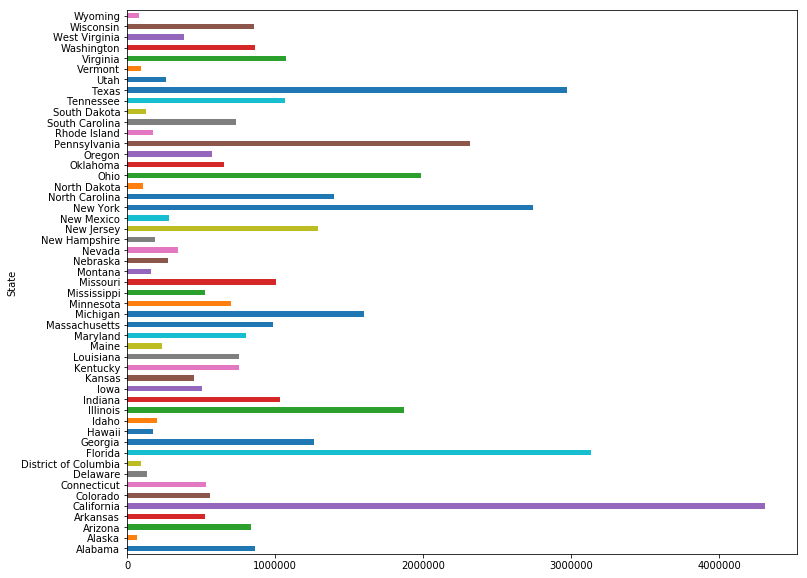

In [25]:
grouped.set_index('State')['Deaths'].plot(kind='barh', figsize=(12,10))

### 1. Create a bar chart of deaths by Race.
### 2. Create a bar chart of deaths by Gender.
### 3. Create a bar chart of population by Race.
### 4. Create a bar chart of population by State.

### We could also investigate if death and population are related with a scatter plot:

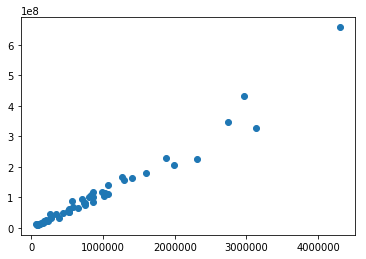

In [30]:
plt.scatter(grouped['Deaths'],grouped['Population'])

Yep, they're pretty darn correlated all right.

### Creating Additional Features
Ok, so we can plot deaths or population by some other feature. What if we want to examine how death rates are related to population by some other feature, such as race? Perhaps we think that there could be some variance there.
Start by first creating a group view, and then create an additional feature.

In [31]:
grouped = df.groupby('Race').sum()
grouped.head(2)

,Notes,State Code,Deaths,Population
Race,,,,
American Indian or Alaska Native,0.0,25694,266319,64074121.0
Asian or Pacific Islander,0.0,27756,873266,282064075.0


Then create an additional column examining the relation between population and deaths.

In [32]:
grouped['Death_Rate'] = grouped.Deaths/grouped.Population
grouped.head(2)

,Notes,State Code,Deaths,Population,Death_Rate
Race,,,,,
American Indian or Alaska Native,0.0,25694,266319,64074121.0,0.004156
Asian or Pacific Islander,0.0,27756,873266,282064075.0,0.003096


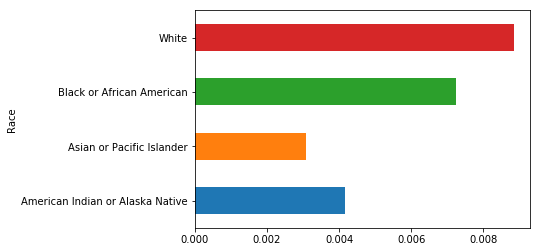

In [33]:
grouped.Death_Rate.plot(kind='barh')

## We can also groupby multiple features.

In [35]:
grouped = df.groupby(['State', 'Race']).sum()
grouped.head()

Notes  State Code  Deaths  \
State   Race                                                          
Alabama American Indian or Alaska Native    0.0          16    1258   
        Asian or Pacific Islander           0.0          20    1739   
        Black or African American           0.0          22  202092   
        White                               0.0          23  655691   
Alaska  American Indian or Alaska Native    0.0          44   14698   

                                          Population  
State   Race                                          
Alabama American Indian or Alaska Native    410369.0  
        Asian or Pacific Islander           921001.0  
        Black or African American         22450567.0  
        White                             59964412.0  
Alaska  American Indian or Alaska Native   2100685.0

Notice that here we had to pass a list of column names to the groupby function.
Also notice the resulting DataFrame; each row is a unique combination of the groupby features we provided. In this case, we will get rows for each State/Race combination possible.

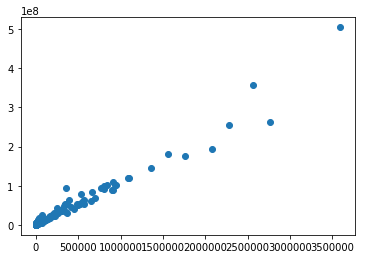

In [37]:
plt.scatter(grouped.Deaths, grouped.Population)

You can also apply different functions:

In [51]:
grouped = df.groupby(['State', 'Race']).mean()
grouped.head()

Notes  State Code        Deaths  \
State   Race                                                                
Alabama American Indian or Alaska Native    NaN         1.0     78.625000   
        Asian or Pacific Islander           NaN         1.0     86.950000   
        Black or African American           NaN         1.0   9186.000000   
        White                               NaN         1.0  28508.304348   
Alaska  American Indian or Alaska Native    NaN         2.0    668.090909   

                                            Population  
State   Race                                            
Alabama American Indian or Alaska Native  2.564806e+04  
        Asian or Pacific Islander         4.605005e+04  
        Black or African American         1.020480e+06  
        White                             2.607148e+06  
Alaska  American Indian or Alaska Native  9.548568e+04

In [52]:
grouped = df.groupby(['State', 'Race']).median()
grouped.head()

Notes  State Code  Deaths  \
State   Race                                                          
Alabama American Indian or Alaska Native    NaN         1.0    80.0   
        Asian or Pacific Islander           NaN         1.0    74.5   
        Black or African American           NaN         1.0  5415.5   
        White                               NaN         1.0  7900.0   
Alaska  American Indian or Alaska Native    NaN         2.0   648.5   

                                          Population  
State   Race                                          
Alabama American Indian or Alaska Native     30349.0  
        Asian or Pacific Islander            41395.5  
        Black or African American          1065362.0  
        White                              3600218.0  
Alaska  American Indian or Alaska Native     85133.0

## Exercises
1. Groupby State and Gender. Sum the values.
2. Groupby State and Gender and Race. Find the average values.
3. Groupby Gender and Race. Find the minimum values.

## Pivot Tables + Stacked Bar Charts
This sets up a great opportunity for us to practice pivot tables and creating stacked bar charts. A pivot table will reformat a subset of our data. In our upcoming example, we're going to make a dataframe where each row is a state, each column is a race and each cell within a row/column is the number of deaths for that Race/State combination.

In [38]:
grouped.head()

Notes  State Code  Deaths  \
State   Race                                                          
Alabama American Indian or Alaska Native    0.0          16    1258   
        Asian or Pacific Islander           0.0          20    1739   
        Black or African American           0.0          22  202092   
        White                               0.0          23  655691   
Alaska  American Indian or Alaska Native    0.0          44   14698   

                                          Population  
State   Race                                          
Alabama American Indian or Alaska Native    410369.0  
        Asian or Pacific Islander           921001.0  
        Black or African American         22450567.0  
        White                             59964412.0  
Alaska  American Indian or Alaska Native   2100685.0

First, reset the index. Notice the subtle difference.

In [39]:
grouped = grouped.reset_index()
grouped.head()

,State,Race,Notes,State Code,Deaths,Population
0,Alabama,American Indian or Alaska Native,0.0,16,1258,410369.0
1,Alabama,Asian or Pacific Islander,0.0,20,1739,921001.0
2,Alabama,Black or African American,0.0,22,202092,22450567.0
3,Alabama,White,0.0,23,655691,59964412.0
4,Alaska,American Indian or Alaska Native,0.0,44,14698,2100685.0


Now it's time to pivot!

In [41]:
pivot = grouped.pivot(index='State', columns='Race', values='Deaths')
pivot.head()

Race,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,White
State,,,,
Alabama,1258,1739,202092,655691
Alaska,14698,2347,1779,44510
Arizona,33445,8157,24507,771985
Arkansas,1008,1800,70413,449693
California,25279,353272,337118,3591392


Again, notice the subtle difference of reseting the index:

In [42]:
pivot = pivot.reset_index( )
pivot.head()

Race,State,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,White
0,Alabama,1258,1739,202092,655691
1,Alaska,14698,2347,1779,44510
2,Arizona,33445,8157,24507,771985
3,Arkansas,1008,1800,70413,449693
4,California,25279,353272,337118,3591392


Now let's make a sweet bar chart!!

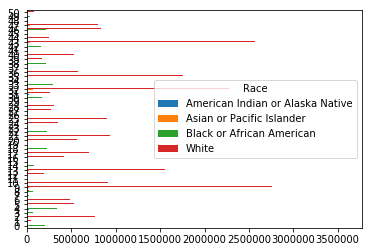

In [43]:
pivot.plot(kind='barh')

Let's make it bigger using the figsize = (width, height) parameter.

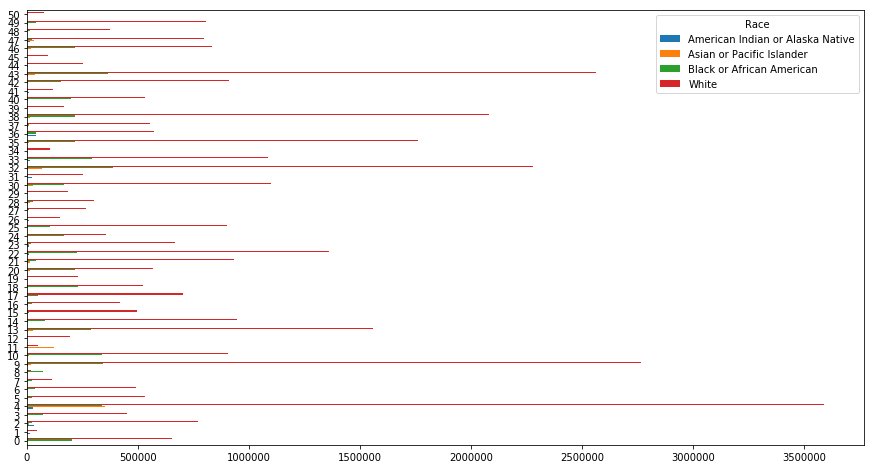

In [44]:
pivot.plot(kind='barh', figsize=(15,8))

Better sized, but where's the states?! Notice the y-axis is just a list of numbers. This is populated by the DataFrame's index. When we used the .reset_index() method, we created a new numbered index to name each row. Let's fix that by making state the index again.

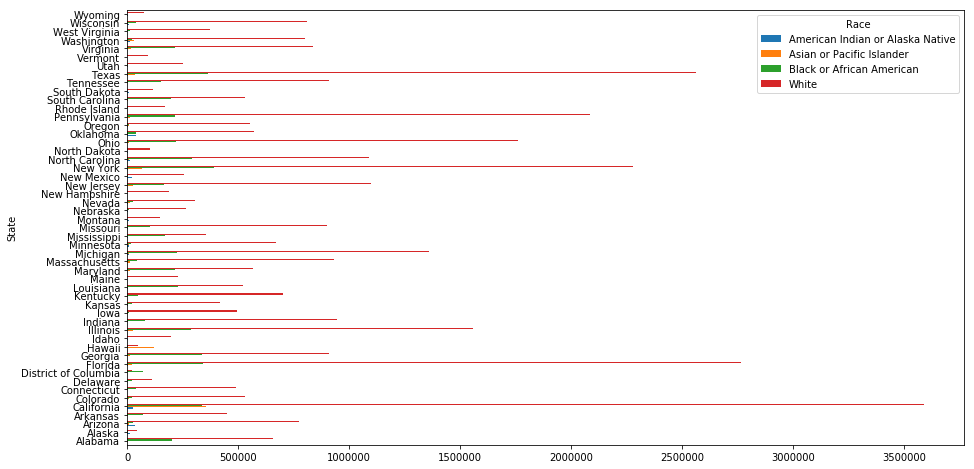

In [45]:
pivot.set_index('State').plot(kind='barh', figsize=(15,8))

Also notice that if we call the DataFrame pivot again, state is not it's index. The above method returned a DataFrame with State as index and we plotted it, but it did not update the DataFrame itself.

In [46]:
pivot.head()

Race,State,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,White
0,Alabama,1258,1739,202092,655691
1,Alaska,14698,2347,1779,44510
2,Arizona,33445,8157,24507,771985
3,Arkansas,1008,1800,70413,449693
4,California,25279,353272,337118,3591392


If we wanted to more permanently change the index we would set it first and then plot:

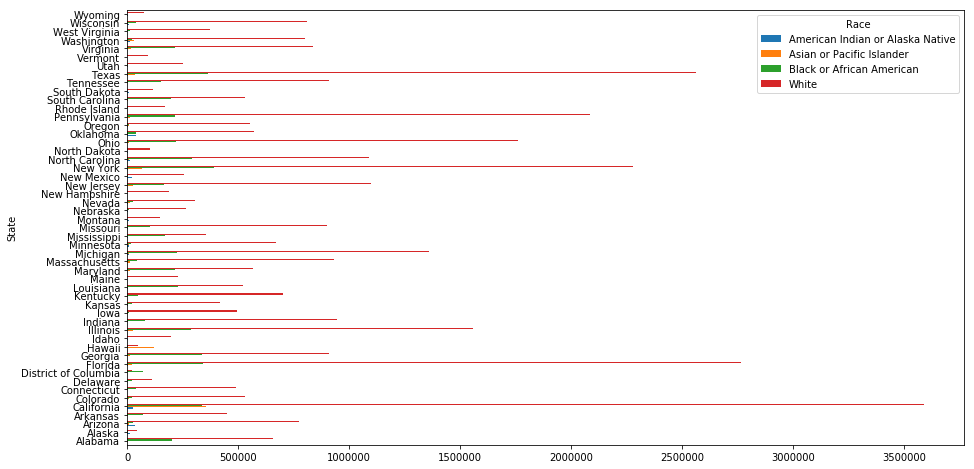

In [47]:
pivot = pivot.set_index('State')
pivot.plot(kind='barh', figsize=(15,8))

In [48]:
pivot.head(2)

Race,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,White
State,,,,
Alabama,1258,1739,202092,655691
Alaska,14698,2347,1779,44510


Lastly, let's stack each of these race bars for each state. Notice we don't have to worry about index here, because we've already set it above.

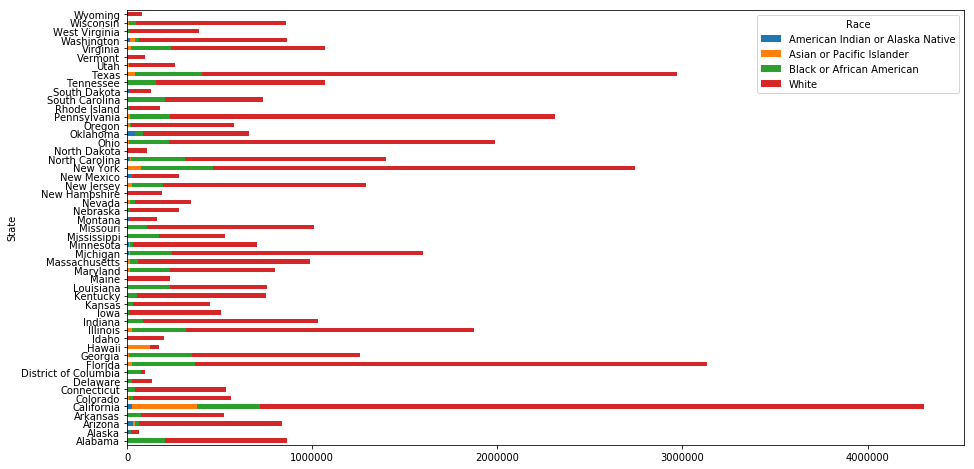

In [49]:
pivot.plot(kind='barh', figsize=(15,8), stacked=True)

### Excercises
1. Create a stacked bar chart of population by gender/state.
        1. Groupby gender/state
        2. Pivot
        3. Plot
2. Create a stacked bar chart of population by race/gender.

### Sorting

In [53]:
pivot.head()

Race,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,White
State,,,,
Alabama,1258,1739,202092,655691
Alaska,14698,2347,1779,44510
Arizona,33445,8157,24507,771985
Arkansas,1008,1800,70413,449693
California,25279,353272,337118,3591392


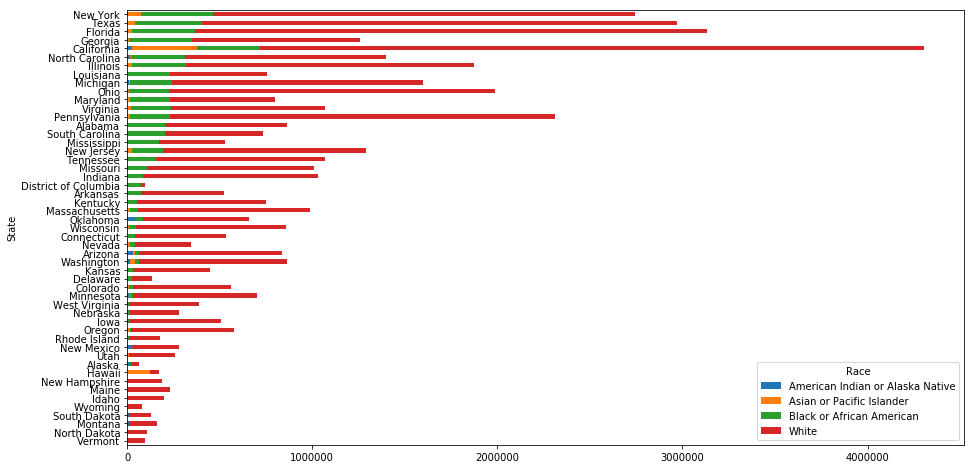

In [55]:
pivot = pivot.sort_values(by='Black or African American')
pivot.plot(kind='barh', stacked=True, figsize=(15,8))

# Exercises
1. Create a simple bar chart of states and their population in ascending order. 
2. Create the same chart as #1 in descending order.
3. Create a stacked bar chart sorted by one feature.
4. Create a stacked bar chart sorted by total height. 

# Plotting

In [ ]:
import matplotlib.pyplot as plt

# Title, Axes and Legends

In [ ]:
plt.xlabel('Xlabel')
plt.ylabel('Ylabel', fontsize=14)
plt.title('This is the title',fontsize = 18)

#Notice the stacked bar chart above has a lenged without needing to call the method.
plt.legend(bbox_to_anchor = (1,1)) #Create a legend, add label="" to figures in the plot. Also play around with colors=

# Exercises
1. Take one of your previous charts and add a title and legend.

### Appendix

#### Cleaner Helper Function (done previously to create the '_cleaned' file).

In [10]:
def remove_not_applicable(x):
    if x == 'Not Applicable':
        return 0
    else:
        return x

In [14]:
df['Population'] = df['Population'].astype(float)

In [11]:
df['Population'] = df['Population'].map(remove_not_applicable)
df.Population.value_counts()[:10]

0         75
87405      2
2108       2
14810      2
113598     2
860        2
9192       2
249        2
367        2
4258       2
Name: Population, dtype: int64

In [12]:
df.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


# The df.info() and series.value_counts() methods

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 12 columns):
Notes                       0 non-null float64
State                       4115 non-null object
State Code                  4115 non-null int64
Ten-Year Age Groups         4115 non-null object
Ten-Year Age Groups Code    4115 non-null object
Gender                      4115 non-null object
Gender Code                 4115 non-null object
Race                        4115 non-null object
Race Code                   4115 non-null object
Deaths                      4115 non-null int64
Population                  4115 non-null float64
Crude Rate                  4115 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 385.9+ KB


In [ ]:
df.Population.value_counts()[:10]

In [10]:
grouped = df.groupby('State')['Deaths'].sum().reset_index()
grouped.head(2)

,State,Deaths
0,Alabama,860780
1,Alaska,63334


In [11]:
grouped = grouped.sort_values(by='Deaths', ascending=False)
grouped.head()

,State,Deaths
4,California,4307061
9,Florida,3131111
43,Texas,2969214
32,New York,2741575
38,Pennsylvania,2313855


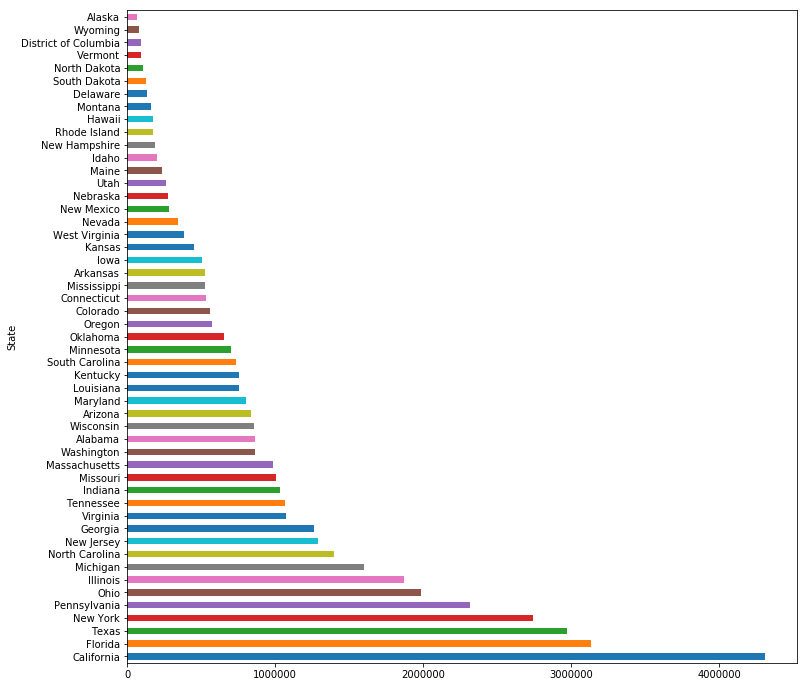

In [12]:
grouped.set_index('State')['Deaths'].plot(kind='barh', figsize=(12,12))

In [13]:
grouped = df.groupby(['Gender', 'Race'])['Deaths'].sum().reset_index()
grouped.head()

,Gender,Race,Deaths
0,Female,American Indian or Alaska Native,120827
1,Female,Asian or Pacific Islander,417760
2,Female,Black or African American,2601979
3,Female,White,19427767
4,Male,American Indian or Alaska Native,145492


## Pivots

In [16]:
pivot = grouped.pivot(index='Race', columns='Gender', values='Deaths')
pivot.head()

Gender,Female,Male
Race,,
American Indian or Alaska Native,120827,145492
Asian or Pacific Islander,417760,455506
Black or African American,2601979,2708957
White,19427767,19034672


In [17]:
pivot.index.Name=None
pivot.head()

Gender,Female,Male
Race,,
American Indian or Alaska Native,120827,145492
Asian or Pacific Islander,417760,455506
Black or African American,2601979,2708957
White,19427767,19034672


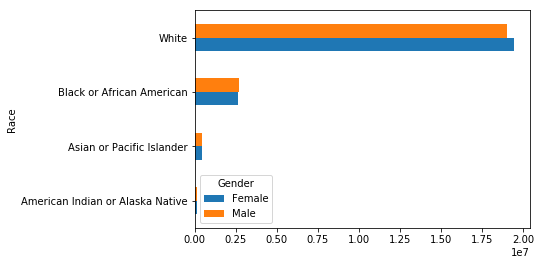

In [19]:
pivot.plot(kind='barh')

## Stacked Bar Charts

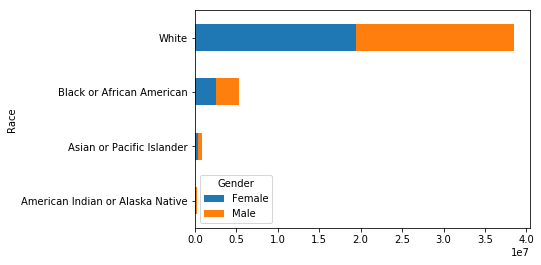

In [20]:
pivot.plot(kind='barh', stacked=True)